In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from countrygroups import EUROPEAN_UNION
import seaborn as sns

In [264]:
dataset1=pd.read_csv('GlobalLandTemperaturesByCity.csv',index_col=['dt'])
df_city=pd.DataFrame(dataset1)
df_city=df_city.reset_index()

dataset2 = pd.read_csv('GlobalLandTemperaturesByCountry.csv',index_col=['dt'])
df_country=pd.DataFrame(dataset2)
df_country=df_country.reset_index()


In [3]:
def cleaning_data(df):
    #df=df.reset_index()
    #casting date field to datetime format to utilise .dt.month attribute
    df['dt'] = pd.to_datetime(df['dt'])
    #creating a dictionary of the fields with null values
    dictionary = (df.isna().any()==True).to_dict()
    
    #iterating through the dictionary to find where True
    for col,val in dictionary.items():
        if val == True:                  
            #creating a dataframe of the null values
            null_df = df[df.isna()[col]==True]

            for i in null_df.index:
                month = df.loc[i,'dt'].to_pydatetime().month
                mean = df[df["dt"].dt.month == month].dropna()[col].mean()
                df.at[i,col]=mean

In [265]:
EU_list = EUROPEAN_UNION.names
EU_list[5] = 'Czech Republic'

df_country['Country'].replace({'France (Europe)':'France','Denmark (Europe)':'Denmark','Netherlands (Europe)':'Netherlands','United Kingdom (Europe)':'Europe'},inplace=True)

df_EU = df_country.set_index('Country').loc[EU_list,:].reset_index()


In [185]:
cleaning_data(df_EU)

In [197]:
df_err = df_EU.groupby('Country')['AverageTemperatureUncertainty'].mean()
df_EU = df_EU.groupby('Country')['AverageTemperature'].mean()
df_EU = df_EU.reset_index()
df_EU = df_EU.merge(df_err,left_on='Country',right_on='Country',how='right')
df_EU = df_EU.sort_values(by='AverageTemperature',ascending=False)


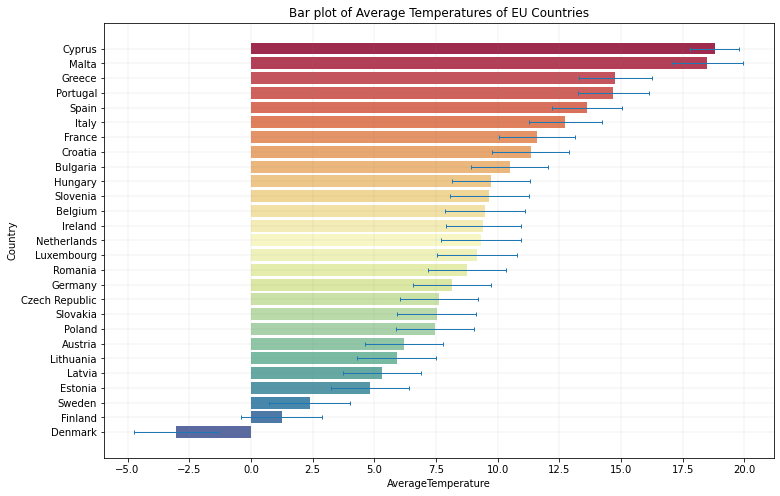

In [252]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='AverageTemperature',y='Country',data=df_EU,palette="Spectral")

ax.errorbar(df_EU['AverageTemperature'],df_EU['Country'],xerr=df_EU['AverageTemperatureUncertainty'],
            elinewidth=1,capsize = 2,fmt = ' ')

ax.set_title('Bar plot of Average Temperatures of EU Countries')
plt.xticks(np.arange(-5, 22, 2.5))
plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.show()


In [266]:
#df_EU = df_EU.groupby('Country')['AverageTemperature'].mean()
df_IE = df_EU[df_EU['Country']=='Ireland']
df_IE['Year'] = df_IE['dt'].dt.year
df_IE = df_IE.groupby('Year')['AverageTemperature'].mean()
df_IE = df_IE.reset_index()
df_IE = df_IE[df_IE['Year']>1943]

AttributeError: Can only use .dt accessor with datetimelike values

In [361]:
df_country['Country'].replace({'France (Europe)':'France','Denmark (Europe)':'Denmark','Netherlands (Europe)':'Netherlands','United Kingdom (Europe)':'Europe'},inplace=True)
df_All = df_country
df_All['dt'] = pd.to_datetime(df_All['dt'])
df_All['Year'] = df_All['dt'].dt.year
#df_All = df_All.groupby('Year')['AverageTemperature'].mean()


In [362]:
#creating blank dataframe
Country = []
diff =  []
new_dict = {'Country':Country, 'TempDiff':diff}
df = pd.DataFrame(new_dict)

In [363]:
#concating all average temperatures per year for each country

for country in df_All['Country'].unique():
    df_new = df_All.set_index('Country').loc[country,:]
    
    df_err = df_new.groupby('Year')['AverageTemperatureUncertainty'].mean()
    df_new = df_new.groupby('Year')['AverageTemperature'].mean()
    df_new =df_new.reset_index()
    df_err= df_err.reset_index()
    df_new = df_new.dropna()
    
    #df_new = df_new.merge(df_err,left_on='Year',right_on='Year',how='right')
    #getting the average temperatures across the first 50 and last 50 years in dataset for each country
    first_50 = df_new.sort_values(by='Year',ascending=True)[:50]
    first_50 = first_50['AverageTemperature'].mean()
    
    last_50 = df_new.sort_values(by='Year',ascending=False)[:50]
    last_50 = last_50['AverageTemperature'].mean()
    
    difference = last_50 - first_50
    
    df_new = pd.DataFrame({'Country':[country,], 'TempDiff':[difference,]})
    
    df = pd.concat([df,df_new])
    
    
    

In [367]:
df.sort_values(by='TempDiff',ascending=False)

,Country,TempDiff
0,Canada,1.960966
0,North America,1.955196
0,United States,1.755338
0,Kazakhstan,1.692499
0,Turkmenistan,1.636527
...,...,...
0,Malta,0.496068
0,French Southern And Antarctic Lands,0.242851
0,Heard Island And Mcdonald Islands,0.223391
0,Denmark,-12.051378


In [391]:
bigChange = df.sort_values(by='TempDiff',ascending=False)[:20]
smallChange = df.sort_values(by='TempDiff',ascending=True)[:10]
changes = pd.concat([bigChange,smallChange])

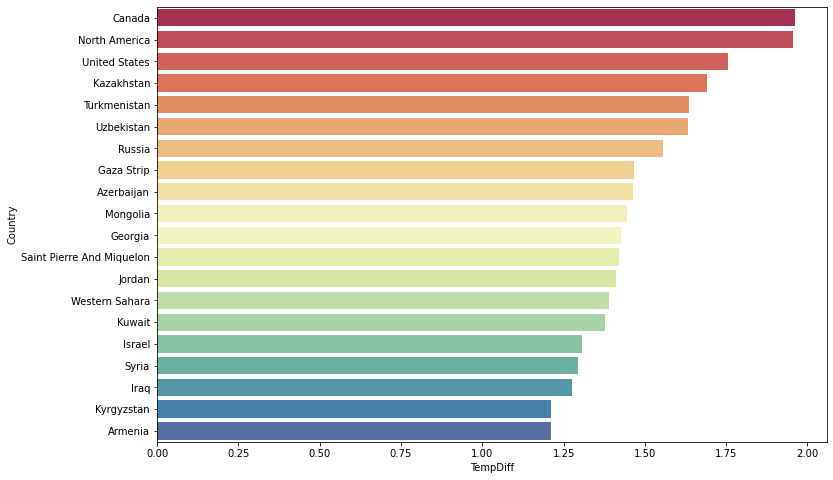

In [392]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='TempDiff',y='Country',data=bigChange,palette="Spectral")